# Second Order Optimization

###### By Hrishikesh Patel, Raghav Dhanuka, Siddharth Uniyal & Dicky Ardian Yunindra  Wardana

## 1) Non-linear Equations and Least Squares

Equations <b>not</b> having form $ f(x) = ax + b $ or $ f(x) = constant $ are considered as non-linear equations. <br>


i.e. $ f(x) = e^{x} + x^{2} $ is a non-liner equation.

### 1.1) Set of Non-linear equations

Consider a set of m equations in n variables $ x_{1},...,x_{n} $ .<br><br>
$ f_{i}(x) = 0;$ <t> $     i = 1,...,m $ <br><br>
Here $ i^{th} $ equation $ f_{i}(x) $ is also a $ i^{th} $ residual. And $x = (x_{1},...,x_{n}) $ is a vector of unknowns. <br><br>
Collectively $ f(x) = (f_{1}(x),...,f_{m}(x)) $, where $ f(x) $ is a vector of residuals.

For example, <br><br>
Consider a system of two non-linear equations $ e^{x_{1}} + (x_{2})^{3} = 4 $ and $ (x_{1})^{2} + cos(x_{2}) = 10 $. <br><br>
Here $x =  (x_{1},x_{2}) $ is a 2-vector of unknowns,<br><br>
$ f_{1}(x) = e^{x_{1}} + (x_{2})^{3} - 4 $ and $ f_{2}(x) = (x_{1})^{2} + cos(x_{2}) - 10 $ are two residuals and <br><br>
$ f(x) = (e^{x_{1}} + (x_{2})^{3} - 4,\ (x_{1})^{2} + cos(x_{2}) - 10) $ is a vector of residuals.

### 1.2) Non-linear Least squares

Here our goal is to find $ \widehat{x} $ which minimizes $ \left \| f(x) \right \|^{2} =  f_{1}(x)^{2} + ... + f_{m}(x)^{2} $.
<br><br>
Optimality condition for any $ \widehat{x} $ being a solution is to satisfy $ \nabla \left \| f(x) \right \|^{2} = 0$.<br><br>
$2D f(x)^Tf(\hat{x})= 0$ <br><br>
<b>Important</b>: The optimality condition is necessary condition but not sufficient. There may be other values that satisfy the condition but they are not solutions.

### 1.3) Difficulty in solving Non-linear Least squares problem

Non-linear least squares are difficult to solve in reality as there is no luxury to have QR factorisation like in Linear equations and least squares problem. <br><br>
However, there are some heuristics algorithms like  following are useful for solving the equations.<br>
1) Gauss-Newton algorithm <br>
2) Levenberg–Marquardt algorithm <br>

Now, if the function is <b>convex</b> then it reduces computation to find the minimum value of the function. Let's understand the concept of Convexity.

### Convexity

#### What is convexity ?

A function is convex if its graph remains above its tangents.

e.g. $ f(x) = x^{2} $ <br>
It is clear that the tangents remain below the graph of $ x^{2} $

<img src="desmos-graph.png" width="300px" height="300px">

Mathematically, function $ F(x_{1},...,x_{n}) $ is convex if its Hessian matrix (second derivative matrix) is positive semidefinite at all x.

#### Why convexity ?

Convexity prevents two local minima and hence if function is convex then it would have usually one minimum value.

# Newton Algorithm
$$ x^{k+1} = x^k - ( \bigtriangledown f(x)^T \bigtriangledown f(x))^{-1} \bigtriangledown f(x)^T * f(x) $$

$$ H = \bigtriangledown f(x)^T \bigtriangledown f(x) $$

In [2]:
using LinearAlgebra,Plots

function newton(f, Df, x1; kmax = 20, tol = 1e-6)
    x = x1
    n = length(x)
    fnorms = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        fnorms = [fnorms; norm(fk)]
        if norm(fk) < tol
            break
        end
        
        if det(Dfk'Dfk) == 0
            println("(Dfk'Dfk) matrix has dependent Columns, therefore, Quitting")
            break            
        end
        
        x = x - inv(Dfk'Dfk)*Dfk'fk

    end
    return x, fnorms
end

newton (generic function with 1 method)

In [3]:
f(x) = (x[1]-3)^2/4 + (x[2]-5)^2/9
Df(x) = [(x[1]-3)/2 2*(x[2]-5)/9]

x, gnorms = newton(f, Df, [0.5, 1.1])
println("")
println("Moved ", length(gnorms), " steps before quitting.")

(Dfk'Dfk) matrix has dependent Columns, therefore, Quitting

Moved 3 steps before quitting.


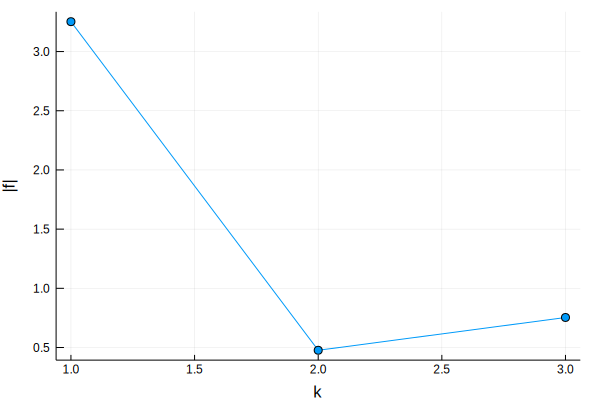

In [4]:
plot(gnorms, shape=:circle, legend = false, xlabel = "k", ylabel = "|f|")

# levenberg-Marquardt Algorithm
<br>
$$ x^{k+1} = x^k - ( \bigtriangledown f(x)^T \bigtriangledown f(x) + \lambda I)^{-1}  \bigtriangledown f(x)^T * f(x) $$

In [5]:
eye(n) = 1.0 .* Matrix(I,n,n)
function levenberg_marquardt(f, Df, x1, lambda1; kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)

    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        
        objectives = [objectives; norm(fk)^2]
        residuals = [residuals; norm(2*Dfk'*fk)]
        
        if norm(2*Dfk'*fk) < tol
            break
        end
        
        xt = x - inv(Dfk'Dfk + lambda*eye(n))*Dfk'fk
        
        if norm(f(xt)) < norm(fk)
            lambda = 0.8*lambda
            x = xt
        else
            lambda = 2.0*lambda
        end
    end
    
    return x, Dict([("objectives", objectives),("residuals", residuals)])
end

levenberg_marquardt (generic function with 1 method)

In [6]:
f(x) = (x[1]-3)^2/4 + (x[2]-5)^2/9
Df(x) = [(x[1]-3)/2 2*(x[2]-5)/9]

x, history = levenberg_marquardt(f, Df, [0.5, 1.1], 1.0)

println("Moved ", length(history["residuals"][1:10]), " steps before function converges to minimum with final step ", x)

Moved 10 steps before function converges to minimum with final step [2.99999; 4.97316]


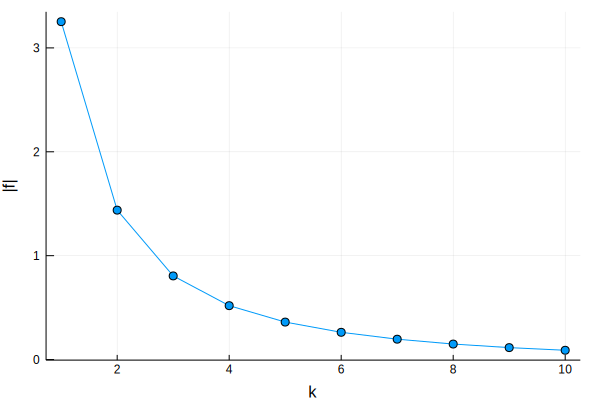

In [7]:
plot(sqrt.(history["objectives"][1:10]), shape = :circle,legend = false, xlabel = "k", ylabel = "|f|")

# Data Fitting

As in linear model fitting, we choose the parameter θ by (approximately) minimizing the sum of the squares of the prediction residuals

$$\sum\limits_{i = 1}^N {{{\left( {\widehat f\left( {{x^{\left( i \right)}};\theta } \right) - {y^{\left( i \right)}}} \right)}^2}} $$

Function we have used here is :
$$f\left( {x;\theta } \right) = {\theta _1}{e^{{\theta _2}x}}\cos \left( {{\theta _3}x + {\theta _4}} \right)$$


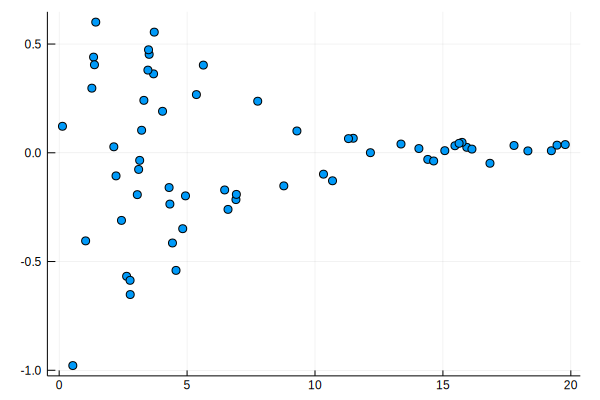

In [8]:
using Random
Random.seed!(45)

theta_ex = [1, -0.2, pi, pi/3]
#Choose 60 points x between 0 and 20.
M = 30
xd = [5*rand(M); 5 .+ 15*rand(M)]

# Evaluate function at these points.
yd = theta_ex[1] * exp.(theta_ex[2]*xd) .*cos.(theta_ex[3] * xd .+ theta_ex[4])

# Create a random perturbation of yd.
N = length(xd)
yd = yd .* (1 .+ 0.2*randn(N)) .+ 0.015 * randn(N)

# Plot data points.
using Plots
scatter(xd, yd, legend=false)

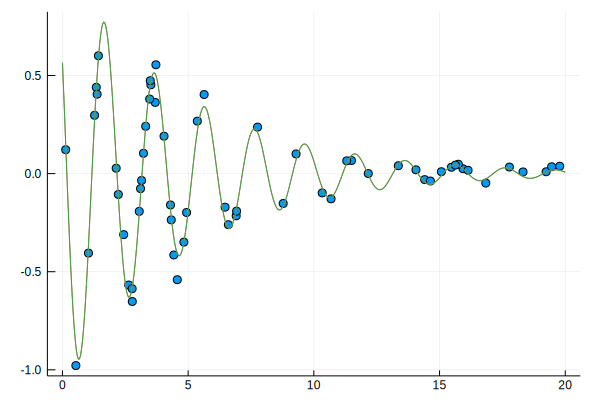

In [10]:
f(theta) = theta[1] * exp.(theta[2]*xd) .*cos.(theta[3] * xd .+ theta[4]) - yd
Df(theta) = hcat(exp.(theta[2]*xd) .* cos.(theta[3] * xd .+ theta[4]),theta[1] * ( xd .* exp.(theta[2]*xd) .*
cos.(theta[3] * xd .+ theta[4])),-theta[1] * ( exp.(theta[2]*xd) .* xd .*sin.(theta[3] * xd .+ theta[4])),
-theta[1] * ( exp.(theta[2]*xd) .*sin.(theta[3] * xd .+ theta[4])) )

theta1 = [1, 0, 1, 0]
theta, history = levenberg_marquardt(f, Df, theta1, 1.0)
theta

# Plot the fitted model.
x = range(0, stop= 20, length = 500)
y=theta[1]*exp.(theta[2]*x) .* cos.(theta[3]*x .+ theta[4])
plot!(x, y, legend = false)